In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from tensorflow.keras.utils import to_categorical

In [2]:
df=pd.read_csv("Resources/Data/movies.csv")
df["like_count%"]=df["like_count"]/df["view_count"]
df["comment_count%"]=df["comment_count"]/df["view_count"]
df=df.replace([np.inf, -np.inf], np.nan)
df=df[df["gross"]!=0]
df.isnull().sum(axis = 0)


movie             0
budge             0
gross             0
comment_count     0
view_count        0
like_count        0
year              0
like_count%       0
comment_count%    0
dtype: int64

In [3]:
dataset=df.copy()
dataset.head()
dataset.head()
dataset["profit"]=dataset["gross"]-dataset["budge"]
df.head()
# X=dataset.iloc[:,[1,3,4,5]]
def posneg(x):
    if x>=0:
        return 1
    else:
        return 0
# y=dataset.iloc[:,[2]]
dataset["profit"]=dataset["profit"].apply(posneg)  


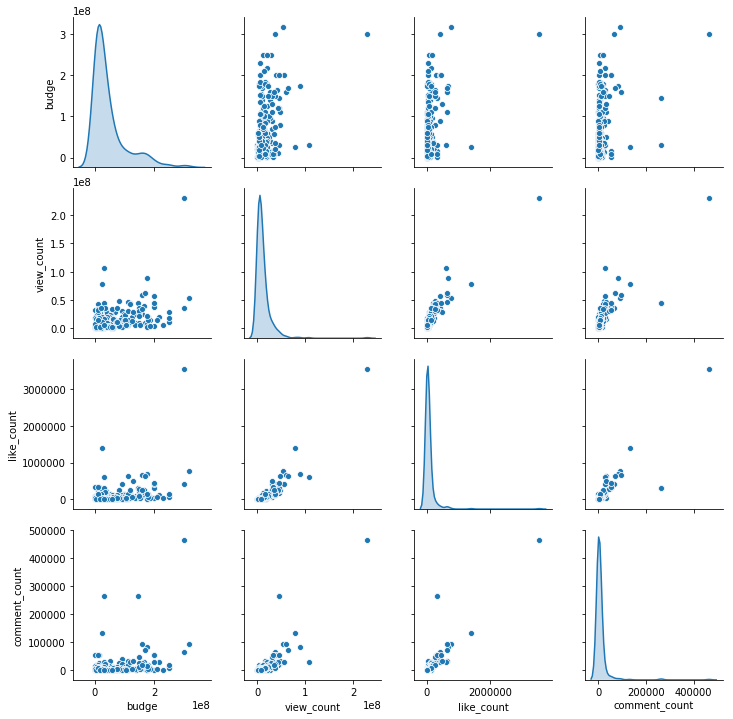

In [4]:
X=dataset.iloc[:,[1,3,4,5,7,8]]
# X=dataset.iloc[:,[1,3,4,5]]

y=dataset.iloc[:,[9]]
# y=dataset.iloc[:,[7]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
sns.pairplot(X_train[["budge", "view_count", "like_count","comment_count"]], diag_kind="kde")
plt.show()
#check distribution of this dataset

In [5]:
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

#check nan values

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)


1.0

In [7]:
rf.score(X_test, y_test)


0.5793650793650794

In [8]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [9]:
model = Sequential()
model.add(Dense(units=15, activation='relu', input_dim=6))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

W0728 16:26:39.511793 21336 deprecation.py:506] From c:\users\yumikee\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Fit the model to the training data
k=model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=2000,
    shuffle=True,
    verbose=2
)

Epoch 1/2000
376/376 - 0s - loss: 0.7034 - acc: 0.4441
Epoch 2/2000
376/376 - 0s - loss: 0.6948 - acc: 0.4601
Epoch 3/2000
376/376 - 0s - loss: 0.6899 - acc: 0.4973
Epoch 4/2000
376/376 - 0s - loss: 0.6854 - acc: 0.5239
Epoch 5/2000
376/376 - 0s - loss: 0.6814 - acc: 0.5426
Epoch 6/2000
376/376 - 0s - loss: 0.6787 - acc: 0.5505
Epoch 7/2000
376/376 - 0s - loss: 0.6758 - acc: 0.5665
Epoch 8/2000
376/376 - 0s - loss: 0.6725 - acc: 0.5665
Epoch 9/2000
376/376 - 0s - loss: 0.6699 - acc: 0.5665
Epoch 10/2000
376/376 - 0s - loss: 0.6673 - acc: 0.5931
Epoch 11/2000
376/376 - 0s - loss: 0.6640 - acc: 0.6090
Epoch 12/2000
376/376 - 0s - loss: 0.6611 - acc: 0.6144
Epoch 13/2000
376/376 - 0s - loss: 0.6574 - acc: 0.6223
Epoch 14/2000
376/376 - 0s - loss: 0.6545 - acc: 0.6356
Epoch 15/2000
376/376 - 0s - loss: 0.6519 - acc: 0.6356
Epoch 16/2000
376/376 - 0s - loss: 0.6491 - acc: 0.6383
Epoch 17/2000
376/376 - 0s - loss: 0.6456 - acc: 0.6410
Epoch 18/2000
376/376 - 0s - loss: 0.6429 - acc: 0.6463
E

Epoch 147/2000
376/376 - 0s - loss: 0.5195 - acc: 0.7394
Epoch 148/2000
376/376 - 0s - loss: 0.5167 - acc: 0.7447
Epoch 149/2000
376/376 - 0s - loss: 0.5168 - acc: 0.7420
Epoch 150/2000
376/376 - 0s - loss: 0.5162 - acc: 0.7447
Epoch 151/2000
376/376 - 0s - loss: 0.5163 - acc: 0.7420
Epoch 152/2000
376/376 - 0s - loss: 0.5166 - acc: 0.7473
Epoch 153/2000
376/376 - 0s - loss: 0.5192 - acc: 0.7420
Epoch 154/2000
376/376 - 0s - loss: 0.5158 - acc: 0.7500
Epoch 155/2000
376/376 - 0s - loss: 0.5155 - acc: 0.7473
Epoch 156/2000
376/376 - 0s - loss: 0.5132 - acc: 0.7447
Epoch 157/2000
376/376 - 0s - loss: 0.5131 - acc: 0.7500
Epoch 158/2000
376/376 - 0s - loss: 0.5136 - acc: 0.7500
Epoch 159/2000
376/376 - 0s - loss: 0.5137 - acc: 0.7500
Epoch 160/2000
376/376 - 0s - loss: 0.5124 - acc: 0.7394
Epoch 161/2000
376/376 - 0s - loss: 0.5122 - acc: 0.7500
Epoch 162/2000
376/376 - 0s - loss: 0.5119 - acc: 0.7447
Epoch 163/2000
376/376 - 0s - loss: 0.5116 - acc: 0.7473
Epoch 164/2000
376/376 - 0s - l

Epoch 291/2000
376/376 - 0s - loss: 0.4620 - acc: 0.7686
Epoch 292/2000
376/376 - 0s - loss: 0.4658 - acc: 0.7660
Epoch 293/2000
376/376 - 0s - loss: 0.4596 - acc: 0.7606
Epoch 294/2000
376/376 - 0s - loss: 0.4605 - acc: 0.7580
Epoch 295/2000
376/376 - 0s - loss: 0.4600 - acc: 0.7660
Epoch 296/2000
376/376 - 0s - loss: 0.4594 - acc: 0.7660
Epoch 297/2000
376/376 - 0s - loss: 0.4605 - acc: 0.7580
Epoch 298/2000
376/376 - 0s - loss: 0.4600 - acc: 0.7606
Epoch 299/2000
376/376 - 0s - loss: 0.4629 - acc: 0.7553
Epoch 300/2000
376/376 - 0s - loss: 0.4574 - acc: 0.7686
Epoch 301/2000
376/376 - 0s - loss: 0.4578 - acc: 0.7660
Epoch 302/2000
376/376 - 0s - loss: 0.4575 - acc: 0.7606
Epoch 303/2000
376/376 - 0s - loss: 0.4567 - acc: 0.7606
Epoch 304/2000
376/376 - 0s - loss: 0.4566 - acc: 0.7660
Epoch 305/2000
376/376 - 0s - loss: 0.4569 - acc: 0.7660
Epoch 306/2000
376/376 - 0s - loss: 0.4565 - acc: 0.7553
Epoch 307/2000
376/376 - 0s - loss: 0.4556 - acc: 0.7660
Epoch 308/2000
376/376 - 0s - l

Epoch 435/2000
376/376 - 0s - loss: 0.4216 - acc: 0.8005
Epoch 436/2000
376/376 - 0s - loss: 0.4215 - acc: 0.7952
Epoch 437/2000
376/376 - 0s - loss: 0.4212 - acc: 0.7926
Epoch 438/2000
376/376 - 0s - loss: 0.4213 - acc: 0.8032
Epoch 439/2000
376/376 - 0s - loss: 0.4207 - acc: 0.7926
Epoch 440/2000
376/376 - 0s - loss: 0.4191 - acc: 0.7899
Epoch 441/2000
376/376 - 0s - loss: 0.4202 - acc: 0.8059
Epoch 442/2000
376/376 - 0s - loss: 0.4191 - acc: 0.8059
Epoch 443/2000
376/376 - 0s - loss: 0.4223 - acc: 0.7793
Epoch 444/2000
376/376 - 0s - loss: 0.4183 - acc: 0.8032
Epoch 445/2000
376/376 - 0s - loss: 0.4202 - acc: 0.8085
Epoch 446/2000
376/376 - 0s - loss: 0.4226 - acc: 0.7979
Epoch 447/2000
376/376 - 0s - loss: 0.4201 - acc: 0.7979
Epoch 448/2000
376/376 - 0s - loss: 0.4184 - acc: 0.8112
Epoch 449/2000
376/376 - 0s - loss: 0.4192 - acc: 0.7926
Epoch 450/2000
376/376 - 0s - loss: 0.4180 - acc: 0.8005
Epoch 451/2000
376/376 - 0s - loss: 0.4169 - acc: 0.7979
Epoch 452/2000
376/376 - 0s - l

Epoch 579/2000
376/376 - 0s - loss: 0.3935 - acc: 0.8165
Epoch 580/2000
376/376 - 0s - loss: 0.3919 - acc: 0.8059
Epoch 581/2000
376/376 - 0s - loss: 0.3930 - acc: 0.8059
Epoch 582/2000
376/376 - 0s - loss: 0.3927 - acc: 0.8218
Epoch 583/2000
376/376 - 0s - loss: 0.3936 - acc: 0.8059
Epoch 584/2000
376/376 - 0s - loss: 0.3929 - acc: 0.8085
Epoch 585/2000
376/376 - 0s - loss: 0.3927 - acc: 0.8191
Epoch 586/2000
376/376 - 0s - loss: 0.3930 - acc: 0.8005
Epoch 587/2000
376/376 - 0s - loss: 0.3919 - acc: 0.8191
Epoch 588/2000
376/376 - 0s - loss: 0.3920 - acc: 0.8112
Epoch 589/2000
376/376 - 0s - loss: 0.3923 - acc: 0.8085
Epoch 590/2000
376/376 - 0s - loss: 0.3913 - acc: 0.8112
Epoch 591/2000
376/376 - 0s - loss: 0.3953 - acc: 0.8165
Epoch 592/2000
376/376 - 0s - loss: 0.3886 - acc: 0.8138
Epoch 593/2000
376/376 - 0s - loss: 0.3932 - acc: 0.8059
Epoch 594/2000
376/376 - 0s - loss: 0.3899 - acc: 0.8218
Epoch 595/2000
376/376 - 0s - loss: 0.3910 - acc: 0.8165
Epoch 596/2000
376/376 - 0s - l

Epoch 723/2000
376/376 - 0s - loss: 0.3769 - acc: 0.8191
Epoch 724/2000
376/376 - 0s - loss: 0.3695 - acc: 0.8218
Epoch 725/2000
376/376 - 0s - loss: 0.3691 - acc: 0.8165
Epoch 726/2000
376/376 - 0s - loss: 0.3702 - acc: 0.8324
Epoch 727/2000
376/376 - 0s - loss: 0.3686 - acc: 0.8298
Epoch 728/2000
376/376 - 0s - loss: 0.3681 - acc: 0.8191
Epoch 729/2000
376/376 - 0s - loss: 0.3687 - acc: 0.8165
Epoch 730/2000
376/376 - 0s - loss: 0.3676 - acc: 0.8271
Epoch 731/2000
376/376 - 0s - loss: 0.3690 - acc: 0.8404
Epoch 732/2000
376/376 - 0s - loss: 0.3689 - acc: 0.8218
Epoch 733/2000
376/376 - 0s - loss: 0.3675 - acc: 0.8245
Epoch 734/2000
376/376 - 0s - loss: 0.3686 - acc: 0.8218
Epoch 735/2000
376/376 - 0s - loss: 0.3720 - acc: 0.8165
Epoch 736/2000
376/376 - 0s - loss: 0.3711 - acc: 0.8351
Epoch 737/2000
376/376 - 0s - loss: 0.3674 - acc: 0.8271
Epoch 738/2000
376/376 - 0s - loss: 0.3677 - acc: 0.8165
Epoch 739/2000
376/376 - 0s - loss: 0.3688 - acc: 0.8404
Epoch 740/2000
376/376 - 0s - l

Epoch 867/2000
376/376 - 0s - loss: 0.3527 - acc: 0.8324
Epoch 868/2000
376/376 - 0s - loss: 0.3508 - acc: 0.8218
Epoch 869/2000
376/376 - 0s - loss: 0.3527 - acc: 0.8484
Epoch 870/2000
376/376 - 0s - loss: 0.3515 - acc: 0.8245
Epoch 871/2000
376/376 - 0s - loss: 0.3532 - acc: 0.8484
Epoch 872/2000
376/376 - 0s - loss: 0.3508 - acc: 0.8378
Epoch 873/2000
376/376 - 0s - loss: 0.3530 - acc: 0.8245
Epoch 874/2000
376/376 - 0s - loss: 0.3530 - acc: 0.8431
Epoch 875/2000
376/376 - 0s - loss: 0.3512 - acc: 0.8191
Epoch 876/2000
376/376 - 0s - loss: 0.3501 - acc: 0.8324
Epoch 877/2000
376/376 - 0s - loss: 0.3532 - acc: 0.8431
Epoch 878/2000
376/376 - 0s - loss: 0.3525 - acc: 0.8271
Epoch 879/2000
376/376 - 0s - loss: 0.3520 - acc: 0.8245
Epoch 880/2000
376/376 - 0s - loss: 0.3523 - acc: 0.8484
Epoch 881/2000
376/376 - 0s - loss: 0.3552 - acc: 0.8218
Epoch 882/2000
376/376 - 0s - loss: 0.3485 - acc: 0.8324
Epoch 883/2000
376/376 - 0s - loss: 0.3518 - acc: 0.8484
Epoch 884/2000
376/376 - 0s - l

Epoch 1011/2000
376/376 - 0s - loss: 0.3357 - acc: 0.8537
Epoch 1012/2000
376/376 - 0s - loss: 0.3385 - acc: 0.8271
Epoch 1013/2000
376/376 - 0s - loss: 0.3350 - acc: 0.8351
Epoch 1014/2000
376/376 - 0s - loss: 0.3376 - acc: 0.8484
Epoch 1015/2000
376/376 - 0s - loss: 0.3356 - acc: 0.8351
Epoch 1016/2000
376/376 - 0s - loss: 0.3359 - acc: 0.8298
Epoch 1017/2000
376/376 - 0s - loss: 0.3363 - acc: 0.8537
Epoch 1018/2000
376/376 - 0s - loss: 0.3365 - acc: 0.8324
Epoch 1019/2000
376/376 - 0s - loss: 0.3372 - acc: 0.8457
Epoch 1020/2000
376/376 - 0s - loss: 0.3370 - acc: 0.8351
Epoch 1021/2000
376/376 - 0s - loss: 0.3347 - acc: 0.8431
Epoch 1022/2000
376/376 - 0s - loss: 0.3352 - acc: 0.8537
Epoch 1023/2000
376/376 - 0s - loss: 0.3353 - acc: 0.8431
Epoch 1024/2000
376/376 - 0s - loss: 0.3362 - acc: 0.8324
Epoch 1025/2000
376/376 - 0s - loss: 0.3340 - acc: 0.8378
Epoch 1026/2000
376/376 - 0s - loss: 0.3352 - acc: 0.8351
Epoch 1027/2000
376/376 - 0s - loss: 0.3425 - acc: 0.8564
Epoch 1028/200

Epoch 1153/2000
376/376 - 0s - loss: 0.3243 - acc: 0.8564
Epoch 1154/2000
376/376 - 0s - loss: 0.3215 - acc: 0.8511
Epoch 1155/2000
376/376 - 0s - loss: 0.3220 - acc: 0.8511
Epoch 1156/2000
376/376 - 0s - loss: 0.3214 - acc: 0.8511
Epoch 1157/2000
376/376 - 0s - loss: 0.3245 - acc: 0.8404
Epoch 1158/2000
376/376 - 0s - loss: 0.3201 - acc: 0.8484
Epoch 1159/2000
376/376 - 0s - loss: 0.3216 - acc: 0.8590
Epoch 1160/2000
376/376 - 0s - loss: 0.3208 - acc: 0.8511
Epoch 1161/2000
376/376 - 0s - loss: 0.3212 - acc: 0.8431
Epoch 1162/2000
376/376 - 0s - loss: 0.3235 - acc: 0.8484
Epoch 1163/2000
376/376 - 0s - loss: 0.3190 - acc: 0.8457
Epoch 1164/2000
376/376 - 0s - loss: 0.3236 - acc: 0.8457
Epoch 1165/2000
376/376 - 0s - loss: 0.3204 - acc: 0.8511
Epoch 1166/2000
376/376 - 0s - loss: 0.3208 - acc: 0.8537
Epoch 1167/2000
376/376 - 0s - loss: 0.3186 - acc: 0.8564
Epoch 1168/2000
376/376 - 0s - loss: 0.3213 - acc: 0.8457
Epoch 1169/2000
376/376 - 0s - loss: 0.3255 - acc: 0.8537
Epoch 1170/200

Epoch 1295/2000
376/376 - 0s - loss: 0.3084 - acc: 0.8537
Epoch 1296/2000
376/376 - 0s - loss: 0.3114 - acc: 0.8590
Epoch 1297/2000
376/376 - 0s - loss: 0.3070 - acc: 0.8723
Epoch 1298/2000
376/376 - 0s - loss: 0.3109 - acc: 0.8644
Epoch 1299/2000
376/376 - 0s - loss: 0.3143 - acc: 0.8457
Epoch 1300/2000
376/376 - 0s - loss: 0.3115 - acc: 0.8670
Epoch 1301/2000
376/376 - 0s - loss: 0.3101 - acc: 0.8564
Epoch 1302/2000
376/376 - 0s - loss: 0.3093 - acc: 0.8590
Epoch 1303/2000
376/376 - 0s - loss: 0.3110 - acc: 0.8511
Epoch 1304/2000
376/376 - 0s - loss: 0.3089 - acc: 0.8617
Epoch 1305/2000
376/376 - 0s - loss: 0.3085 - acc: 0.8564
Epoch 1306/2000
376/376 - 0s - loss: 0.3092 - acc: 0.8511
Epoch 1307/2000
376/376 - 0s - loss: 0.3099 - acc: 0.8590
Epoch 1308/2000
376/376 - 0s - loss: 0.3127 - acc: 0.8590
Epoch 1309/2000
376/376 - 0s - loss: 0.3150 - acc: 0.8431
Epoch 1310/2000
376/376 - 0s - loss: 0.3112 - acc: 0.8697
Epoch 1311/2000
376/376 - 0s - loss: 0.3106 - acc: 0.8617
Epoch 1312/200

Epoch 1437/2000
376/376 - 0s - loss: 0.3008 - acc: 0.8697
Epoch 1438/2000
376/376 - 0s - loss: 0.3020 - acc: 0.8590
Epoch 1439/2000
376/376 - 0s - loss: 0.3006 - acc: 0.8617
Epoch 1440/2000
376/376 - 0s - loss: 0.3046 - acc: 0.8617
Epoch 1441/2000
376/376 - 0s - loss: 0.3052 - acc: 0.8511
Epoch 1442/2000
376/376 - 0s - loss: 0.3024 - acc: 0.8697
Epoch 1443/2000
376/376 - 0s - loss: 0.3098 - acc: 0.8457
Epoch 1444/2000
376/376 - 0s - loss: 0.2996 - acc: 0.8644
Epoch 1445/2000
376/376 - 0s - loss: 0.2982 - acc: 0.8697
Epoch 1446/2000
376/376 - 0s - loss: 0.2977 - acc: 0.8590
Epoch 1447/2000
376/376 - 0s - loss: 0.2971 - acc: 0.8750
Epoch 1448/2000
376/376 - 0s - loss: 0.2999 - acc: 0.8590
Epoch 1449/2000
376/376 - 0s - loss: 0.3020 - acc: 0.8564
Epoch 1450/2000
376/376 - 0s - loss: 0.2999 - acc: 0.8537
Epoch 1451/2000
376/376 - 0s - loss: 0.2974 - acc: 0.8697
Epoch 1452/2000
376/376 - 0s - loss: 0.3015 - acc: 0.8590
Epoch 1453/2000
376/376 - 0s - loss: 0.2975 - acc: 0.8617
Epoch 1454/200

Epoch 1579/2000
376/376 - 0s - loss: 0.2893 - acc: 0.8617
Epoch 1580/2000
376/376 - 0s - loss: 0.2919 - acc: 0.8670
Epoch 1581/2000
376/376 - 0s - loss: 0.2949 - acc: 0.8590
Epoch 1582/2000
376/376 - 0s - loss: 0.2904 - acc: 0.8697
Epoch 1583/2000
376/376 - 0s - loss: 0.2904 - acc: 0.8644
Epoch 1584/2000
376/376 - 0s - loss: 0.2894 - acc: 0.8590
Epoch 1585/2000
376/376 - 0s - loss: 0.2890 - acc: 0.8777
Epoch 1586/2000
376/376 - 0s - loss: 0.2878 - acc: 0.8644
Epoch 1587/2000
376/376 - 0s - loss: 0.2907 - acc: 0.8697
Epoch 1588/2000
376/376 - 0s - loss: 0.2908 - acc: 0.8670
Epoch 1589/2000
376/376 - 0s - loss: 0.2884 - acc: 0.8697
Epoch 1590/2000
376/376 - 0s - loss: 0.2912 - acc: 0.8617
Epoch 1591/2000
376/376 - 0s - loss: 0.2928 - acc: 0.8670
Epoch 1592/2000
376/376 - 0s - loss: 0.2899 - acc: 0.8697
Epoch 1593/2000
376/376 - 0s - loss: 0.2895 - acc: 0.8750
Epoch 1594/2000
376/376 - 0s - loss: 0.2993 - acc: 0.8697
Epoch 1595/2000
376/376 - 0s - loss: 0.2954 - acc: 0.8564
Epoch 1596/200

Epoch 1721/2000
376/376 - 0s - loss: 0.2891 - acc: 0.8644
Epoch 1722/2000
376/376 - 0s - loss: 0.2814 - acc: 0.8777
Epoch 1723/2000
376/376 - 0s - loss: 0.2828 - acc: 0.8670
Epoch 1724/2000
376/376 - 0s - loss: 0.2829 - acc: 0.8644
Epoch 1725/2000
376/376 - 0s - loss: 0.2853 - acc: 0.8723
Epoch 1726/2000
376/376 - 0s - loss: 0.2812 - acc: 0.8697
Epoch 1727/2000
376/376 - 0s - loss: 0.2845 - acc: 0.8750
Epoch 1728/2000
376/376 - 0s - loss: 0.2818 - acc: 0.8750
Epoch 1729/2000
376/376 - 0s - loss: 0.2808 - acc: 0.8750
Epoch 1730/2000
376/376 - 0s - loss: 0.2827 - acc: 0.8697
Epoch 1731/2000
376/376 - 0s - loss: 0.2857 - acc: 0.8723
Epoch 1732/2000
376/376 - 0s - loss: 0.2833 - acc: 0.8777
Epoch 1733/2000
376/376 - 0s - loss: 0.2816 - acc: 0.8670
Epoch 1734/2000
376/376 - 0s - loss: 0.2803 - acc: 0.8670
Epoch 1735/2000
376/376 - 0s - loss: 0.2838 - acc: 0.8670
Epoch 1736/2000
376/376 - 0s - loss: 0.2845 - acc: 0.8617
Epoch 1737/2000
376/376 - 0s - loss: 0.2815 - acc: 0.8750
Epoch 1738/200

Epoch 1863/2000
376/376 - 0s - loss: 0.2800 - acc: 0.8697
Epoch 1864/2000
376/376 - 0s - loss: 0.2752 - acc: 0.8723
Epoch 1865/2000
376/376 - 0s - loss: 0.2783 - acc: 0.8670
Epoch 1866/2000
376/376 - 0s - loss: 0.2746 - acc: 0.8723
Epoch 1867/2000
376/376 - 0s - loss: 0.2743 - acc: 0.8830
Epoch 1868/2000
376/376 - 0s - loss: 0.2787 - acc: 0.8750
Epoch 1869/2000
376/376 - 0s - loss: 0.2755 - acc: 0.8644
Epoch 1870/2000
376/376 - 0s - loss: 0.2805 - acc: 0.8723
Epoch 1871/2000
376/376 - 0s - loss: 0.2895 - acc: 0.8670
Epoch 1872/2000
376/376 - 0s - loss: 0.2745 - acc: 0.8750
Epoch 1873/2000
376/376 - 0s - loss: 0.2760 - acc: 0.8830
Epoch 1874/2000
376/376 - 0s - loss: 0.2739 - acc: 0.8723
Epoch 1875/2000
376/376 - 0s - loss: 0.2763 - acc: 0.8830
Epoch 1876/2000
376/376 - 0s - loss: 0.2751 - acc: 0.8803
Epoch 1877/2000
376/376 - 0s - loss: 0.2766 - acc: 0.8750
Epoch 1878/2000
376/376 - 0s - loss: 0.2769 - acc: 0.8644
Epoch 1879/2000
376/376 - 0s - loss: 0.2763 - acc: 0.8697
Epoch 1880/200

In [12]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

126/126 - 0s - loss: 1.8503 - acc: 0.6349
Deep Neural Network - Loss: 1.8502786802867102, Accuracy: 0.6349206566810608


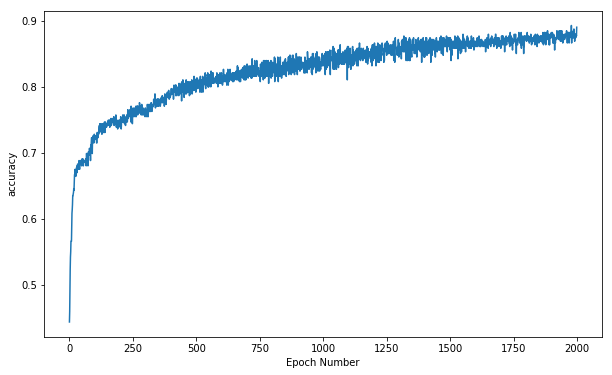

In [13]:
plt.figure(figsize=(10,6))
plt.xlabel('Epoch Number')
plt.ylabel("accuracy")

plt.plot(k.history['acc'])

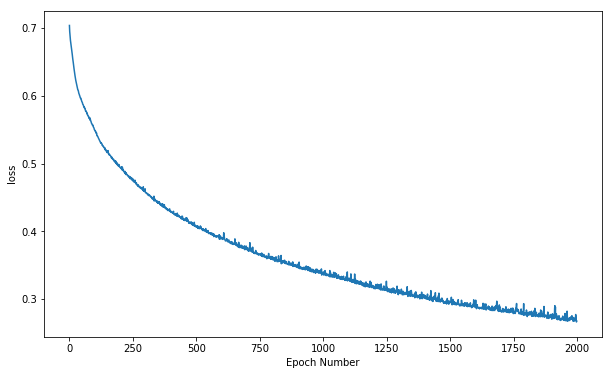

In [14]:
plt.figure(figsize=(10,6))

plt.xlabel('Epoch Number')
plt.ylabel("loss")

plt.plot(k.history['loss'])

In [15]:
deepkk=model.predict_classes(X_test_scaled)
y_comp=y_test.copy()
y_comp["profit_predict"]=deepkk
y_comp.tail()

,profit,profit_predict
496,1,1
327,1,0
251,1,0
141,1,1
447,1,0


In [17]:
zz=(y_comp["profit"]==y_comp["profit_predict"]).sum()/len(deepkk)

In [21]:
print(f"accuracy on test dataset is {round(zz*100,2)}%")

accuracy on test dataset is 63.49%
